In [61]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [94]:
ground_truth = 'Label' # or P
baseOut = 'Outputs'
with open('{}/similarities_{}.json'.format(baseOut, ground_truth), "r") as file:
    similarities = json.load(file)

In [84]:
df = pd.DataFrame(columns = ['Structure', 'Truth', 'OO', 'OH', 'HOH', 'ZOH', 'Hbond', 'Order'])
for i, (key, value) in enumerate(similarities.items()):
    df.loc[i] = [key, ground_truth, value['OO_dist']['wdistancec'], value['OH_dist']['wdistancec'], value['HOH_dist']['wdistancec'], value['ThetaOH_dist']['wdistancec'], value['Hbonds']['wdistancec'], value['OrderP']['wdistancec']]

In [86]:

df_ref = df[df["Structure"].str.contains("Ref")]
df_L10L10 = df[df["Structure"].str.contains("L10_L10")]

In [91]:
df_P = df[df["Structure"] == 'P']

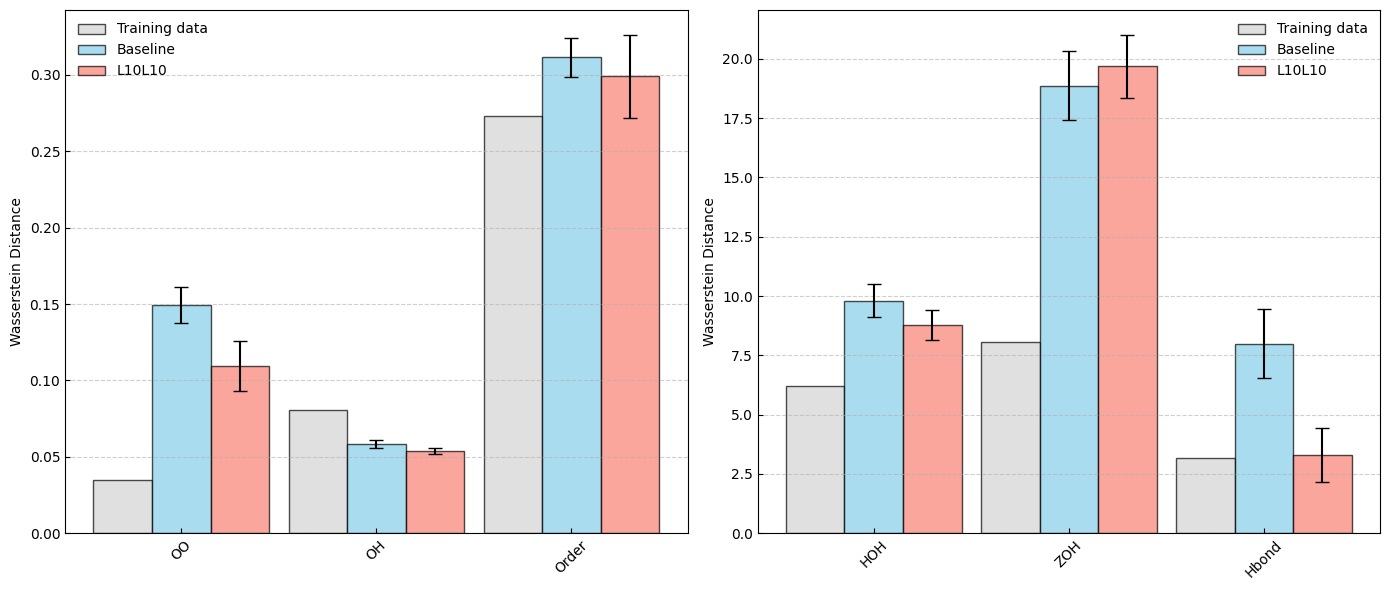

In [96]:
def plot_comparison_subplots(df0, df1, df2, numeric_columns, small_range_features, large_range_features, label0="Dataset 0", label1="Dataset 1", label2="Dataset 2", save_as=None):
    """
    Plots a comparison of mean values with error bars for three datasets,
    using two subplots: one for small-range features and one for large-range features.

    Parameters:
    df0 (pd.DataFrame): First dataset.
    df1 (pd.DataFrame): Second dataset.
    df2 (pd.DataFrame): Third dataset.
    numeric_columns (list): List of all numeric columns.
    small_range_features (list): Features with small values to be plotted separately.
    large_range_features (list): Features with larger values.
    label0 (str): Label for the first dataset.
    label1 (str): Label for the second dataset.
    label2 (str): Label for the third dataset.
    save_as (str, optional): File path to save the figure.

    Returns:
    None
    """
    # Compute mean and standard deviation for all datasets
    mean_values0 = df0[numeric_columns].mean()
    std_values0 = df0[numeric_columns].std()
    mean_values1 = df1[numeric_columns].mean()
    std_values1 = df1[numeric_columns].std()
    mean_values2 = df2[numeric_columns].mean()
    std_values2 = df2[numeric_columns].std()

    # Define bar width and positions
    x1 = np.arange(len(small_range_features))  # X positions for small range features
    x2 = np.arange(len(large_range_features))  # X positions for large range features
    bar_width = 0.3  # Adjusted width for three bars

    # Create figure with subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Plot for small range features
    axes[0].bar(x1 - bar_width, mean_values0[small_range_features], yerr=std_values0[small_range_features], capsize=5,
                alpha=0.7, width=bar_width, label=label0, color='lightgray', edgecolor='black')
    axes[0].bar(x1, mean_values1[small_range_features], yerr=std_values1[small_range_features], capsize=5,
                alpha=0.7, width=bar_width, label=label1, color='skyblue', edgecolor='black')
    axes[0].bar(x1 + bar_width, mean_values2[small_range_features], yerr=std_values2[small_range_features], capsize=5,
                alpha=0.7, width=bar_width, label=label2, color='salmon', edgecolor='black')

    # Plot for large range features
    axes[1].bar(x2 - bar_width, mean_values0[large_range_features], yerr=std_values0[large_range_features], capsize=5,
                alpha=0.7, width=bar_width, label=label0, color='lightgray', edgecolor='black')
    axes[1].bar(x2, mean_values1[large_range_features], yerr=std_values1[large_range_features], capsize=5,
                alpha=0.7, width=bar_width, label=label1, color='skyblue', edgecolor='black')
    axes[1].bar(x2 + bar_width, mean_values2[large_range_features], yerr=std_values2[large_range_features], capsize=5,
                alpha=0.7, width=bar_width, label=label2, color='salmon', edgecolor='black')

    # Labels and titles for both subplots
    axes[0].set_ylabel("Wasserstein Distance")
    axes[0].set_xticks(ticks=x1)
    axes[0].set_xticklabels(small_range_features, rotation=45)
    axes[0].grid(axis='y', linestyle='--', alpha=0.6)
    axes[0].legend()

    axes[1].set_ylabel("Wasserstein Distance")
    axes[1].set_xticks(ticks=x2)
    axes[1].set_xticklabels(large_range_features, rotation=45)
    axes[1].grid(axis='y', linestyle='--', alpha=0.6)
    axes[1].legend()

    # Adjust layout and show plot
    plt.tight_layout()
    if save_as is not None:
        plt.savefig(save_as)
    plt.show()

plot_comparison_subplots(df_P, df_ref, df_L10L10, numeric_columns, ['OO', 'OH', 'Order'], ['HOH', 'ZOH', 'Hbond'], label0="Training data", label1="Baseline", label2="L10L10", save_as='{}/comparision_to_{}.pdf'.format(baseOut, ground_truth))